# Australian Geoscience Datacube
## Feature Summary Examples

The [Australian Geoscience Datacube](https://github.com/data-cube/agdc-v2) provides an integrated gridded data analysis environment for decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

For instructions on using the Datacube on NCI, see: http://agdc-v2.readthedocs.io/en/develop/nci_usage.html

For instructions on setting up your own instance, see: http://agdc-v2.readthedocs.io/en/develop/install.html

This notebook touches briefly on some the implimented features of the Datacube module, and is only intended to deomstrat functionality rather than be a tutorial.

In [2]:
# makes the plots appear within the notebook
%matplotlib inline
import datacube

If you have set up your config correctly, or are using the module on NCI, you should be able to make `Datacube` object that can connects to the configured datacube system.

In [3]:
# Create a handle so you don't have to keep typing Datacube
dc = datacube.Datacube(app='dc-example')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://cek156@130.56.244.227:6432/datacube)>>>

## Datacube products and measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [38]:
# List the products currently in the datacube
dc.list_products()

name  \
id                                 
36            bom_rainfall_grids   
32                      dsm1sv10   
48                     gamma_ray   
42                 ls5_fc_albers   
2               ls5_level1_scene   
6                ls5_nbar_albers   
3                 ls5_nbar_scene   
26              ls5_nbart_albers   
4                ls5_nbart_scene   
41               ls5_ndvi_albers   
23                 ls5_pq_albers   
5                   ls5_pq_scene   
1   ls5_satellite_telemetry_data   
44                 ls7_fc_albers   
9               ls7_level1_scene   
21               ls7_nbar_albers   
10                ls7_nbar_scene   
29              ls7_nbart_albers   
11               ls7_nbart_scene   
45               ls7_ndvi_albers   
22                 ls7_pq_albers   
12                  ls7_pq_scene   
8   ls7_satellite_telemetry_data   
47                 ls8_fc_albers   
40          ls8_level1_oli_scene   
14              ls8_level1_scene   
19               ls8_nbar_albers   
15                ls8_nbar_scene   
28              ls8_nbart_albers   
16               ls8_nbart_scene   
20                 ls8_pq_albers   
17                  ls8_pq_scene   
13  ls8_satellite_telemetry_data   
46                   wofs_albers   

                                          description  \
id                                                      
36  Interpolated Rain Gauge Precipitation 1-Day Au...   
32                               DSM 1sec Version 1.0   
48  The 2015 radiometric or gamma-ray grid of Aust...   
42  Landsat 5 Fractional Cover 25 metre, 100km til...   
2       Landsat 5 Level 1 At-sensor Radiance 25 metre   
6   Landsat 5 Surface Reflectance NBAR 25 metre, 1...   
3                             Landsat 5 NBAR 25 metre   
26  Landsat 5 Surface Reflectance NBART 25 metre, ...   
4                            Landsat 5 NBART 25 metre   
41  Landsat 5 Normalised Difference Vegetation Ind...   
23  Landsat 5 Pixel Quality 25 metre, 100km tile, ...   
5                               Landsat 5 PQ 25 metre   
1                  Landsat 5 Satellite Telemetry Data   
44  Landsat 7 Fractional Cover 25 metre, 100km til...   
9       Landsat 7 Level 1 At-sensor Radiance 25 metre   
21  Landsat 7 Surface Reflectance NBAR 25 metre, 1...   
10                            Landsat 7 NBAR 25 metre   
29  Landsat 7 Surface Reflectance NBART 25 metre, ...   
11                           Landsat 7 NBART 25 metre   
45  Landsat 7 Normalised Difference Vegetation Ind...   
22  Landsat 7 Pixel Quality 25 metre, 100km tile, ...   
12                              Landsat 7 PQ 25 metre   
8                  Landsat 7 Satellite Telemetry Data   
47  Landsat 8 Fractional Cover 25 metre, 100km til...   
40  Landsat 8 Level 1 OLI At-sensor Radiance 25 metre   
14  Landsat 8 Level 1 OLI-TIRS At-sensor Radiance ...   
19  Landsat 8 Surface Reflectance NBAR 25 metre, 1...   
15                            Landsat 8 NBAR 25 metre   
28  Landsat 8 Surface Relfectance NBART 25 metre, ...   
16                           Landsat 8 NBART 25 metre   
20  Landsat 8 Pixel Quality 25 metre, 100km tile, ...   
17                              Landsat 8 PQ 25 metre   
13                 Landsat 8 Satellite Telemetry Data   
46  Historic Flood Mapping Water Observations from...   

                product_type  sat_path   format  lon   platform  sat_row  \
id                                                                         
36                  rainfall       NaN   NETCDF  NaN        BoM      NaN   
32                       DEM       NaN     ENVI  NaN       SRTM      NaN   
48                 gamma_ray       NaN   NETCDF  NaN   aircraft      NaN   
42          fractional_cover       NaN   NetCDF  NaN  LANDSAT_5      NaN   
2                     level1       NaN  GeoTiff  NaN  LANDSAT_5      NaN   
6                       nbar       NaN   NetCDF  NaN  LANDSAT_5      NaN   
3                       nbar       NaN  GeoTiff  NaN  LANDSAT_5      N

## Datacube Measurements
The list of measurements stored in the datacube can also be listed.

Measurements are also known as _bands_ in the imagery domain, and _data variables_ when stored in NetCDF files or when working with `xarray.Dataset` objects.

In [39]:
# List the available measurements/datasets available for each product
dc.list_measurements()

aliases    dtype  \
product            measurement                                             
bom_rainfall_grids rainfall                                 NaN  float32   
dsm1sv10           elevation                                NaN  float32   
gamma_ray          rad_air_dose_rate                        NaN  float32   
                   rad_k_equiv_conc                         NaN  float32   
                   rad_ratio_tk                             NaN  float32   
                   rad_ratio_u2t                            NaN  float32   
                   rad_ratio_uk                             NaN  float32   
                   rad_ratio_ut                             NaN  float32   
                   rad_u_equiv_conc                         NaN  float32   
ls5_fc_albers      BS                                    [bare]     int8   
                   PV                               [green_veg]     int8   
                   NPV                               [dead_veg]     int8   
                   UE                                     [err]     int8   
ls5_nbar_albers    blue                          [band_1, blue]    int16   
                   green                        [band_2, green]    int16   
                   red                            [band_3, red]    int16   
                   nir                            [band_4, nir]    int16   
                   swir1                        [band_5, swir1]    int16   
                   swir2                        [band_7, swir2]    int16   
ls5_nbar_scene     1                             [band_1, blue]    int16   
                   2                            [band_2, green]    int16   
                   3                              [band_3, red]    int16   
                   4                              [band_4, nir]    int16   
                   5                            [band_5, swir1]    int16   
                   7                            [band_7, swir2]    int16   
ls5_nbart_albers   blue                          [band_1, blue]    int16   
                   green                        [band_2, green]    int16   
                   red                            [band_3, red]    int16   
                   nir                            [band_4, nir]    int16   
                   swir1                        [band_5, swir1]    int16   
...                                                         ...      ...   
ls8_nbar_albers    blue                          [band_2, blue]    int16   
                   green                        [band_3, green]    int16   
                   red                            [band_4, red]    int16   
                   nir                            [band_5, nir]    int16   
                   swir1                        [band_6, swir1]    int16   
                   swir2                        [band_7, swir2]    int16   
ls8_nbar_scene     1                  [band_1, coastal_aerosol]    int16   
                   2                             [band_2, blue]    int16   
                   3                            [band_3, green]    int16   
                   4                              [band_4, red]    int16   
                   5                              [band_5, nir]    int16   
                   6                            [band_6, swir1]    int16   
                   7                            [band_7, swir2]    int16   
ls8_nbart_albers   coastal_aerosol    [band_1, coastal_aerosol]    int16   
                   blue                          [band_2, blue]    int16   
                   green                        [band_3, green]    int16   
                   red                            [band_4, red]    int16   
                   nir                            [band_5, nir]    int16   
                   swir1                        [band_6, swir1]    int16   
                   swir2                        [band_7, swir2]    int16   
ls8_nbart_scene    1        

## Retrieving data


In [40]:
# Load in some data from the datacube, and call it "nbar"
# Get the data from ls5_nbar_albers, at the given x/y (lat/lon) coordinates in WGS84
# (load options: product=None, measurements=None, output_crs=None, resolution=None, 
# resampling=None, stack=False, dask_chunks=None, like=None, fuse_func=None, align=None, **query)
nbar = dc.load(product='ls5_nbar_albers', x=(149.25, 149.35), y=(-35.25, -35.35))

The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

In [41]:
# Show me what is in "nbar"
nbar

<xarray.Dataset>
Dimensions:  (time: 638, x: 421, y: 490)
Coordinates:
  * time     (time) datetime64[ns] 1987-05-29T23:14:29.500000 ...
  * y        (y) float64 -3.956e+06 -3.956e+06 -3.956e+06 -3.956e+06 ...
  * x        (x) float64 1.56e+06 1.56e+06 1.56e+06 1.56e+06 1.56e+06 ...
Data variables:
    blue     (time, y, x) int16 495 495 495 585 676 585 449 358 266 266 358 ...
    green    (time, y, x) int16 885 980 885 980 980 885 885 789 692 596 693 ...
    red      (time, y, x) int16 914 1080 914 914 997 997 914 747 747 747 747 ...
    nir      (time, y, x) int16 2587 2317 2046 2317 2407 2226 2407 2226 2226 ...
    swir1    (time, y, x) int16 2567 2567 2502 2502 2308 2114 2114 1985 1921 ...
    swir2    (time, y, x) int16 1655 1556 1556 1556 1655 1556 1357 1059 1059 ...
Attributes:
    crs: EPSG:3577

We can look at the data by name directly, or through the `data_vars` dictionary:

In [42]:
# See what is held in each variable
nbar.data_vars

Data variables:
    blue     (time, y, x) int16 495 495 495 585 676 585 449 358 266 266 358 ...
    green    (time, y, x) int16 885 980 885 980 980 885 885 789 692 596 693 ...
    red      (time, y, x) int16 914 1080 914 914 997 997 914 747 747 747 747 ...
    nir      (time, y, x) int16 2587 2317 2046 2317 2407 2226 2407 2226 2226 ...
    swir1    (time, y, x) int16 2567 2567 2502 2502 2308 2114 2114 1985 1921 ...
    swir2    (time, y, x) int16 1655 1556 1556 1556 1655 1556 1357 1059 1059 ...

In [43]:
# Show me just the variable "green"
nbar.green

<xarray.DataArray 'green' (time: 638, y: 490, x: 421)>
array([[[ 885,  980,  885, ..., 2948, 2948, 2948],
        [ 885,  980,  885, ..., 2948, 3040, 2948],
        [1076,  980,  885, ..., 2948, 3040, 3131],
        ..., 
        [-999, -999, -999, ...,  506,  506,  506],
        [-999, -999, -999, ...,  409,  699,  699],
        [-999, -999, -999, ...,  409,  506,  506]],

       [[ 928, 1024,  928, ..., 3001, 3001, 3001],
        [ 928, 1025,  928, ..., 3001, 3093, 3001],
        [1120, 1025,  928, ..., 3001, 3001, 3185],
        ..., 
        [ 352,  254,  254, ...,  549,  646,  549],
        [ 352,  254,  156, ...,  451,  743,  743],
        [ 450,  450,  254, ...,  451,  549,  549]],

       [[1818, 2024, 2637, ..., 4032, 4327, 4717],
        [2127, 2229, 2839, ..., 3835, 4032, 4327],
        [2434, 2434, 2840, ..., 4032, 4032, 4620],
        ..., 
        [1936, 1832, 1832, ..., 8330, 8056, 8239],
        [1624, 1624, 1624, ..., 8602, 8330, 8239],
        [1415, 1520, 1624, ..., 

## Plotting data
We can select the data at a particular time and see what is there. We can use pandas-style labels to select a time period, inclusive of the end label:

In [44]:
# Define a new variable "autumn"
# In nbar, in green, at the given location/time (Pandas notation)
autumn = nbar.green.loc['1991-3':'1991-5']
# What are the dimensions of my new variable?
autumn.shape

(9, 490, 421)

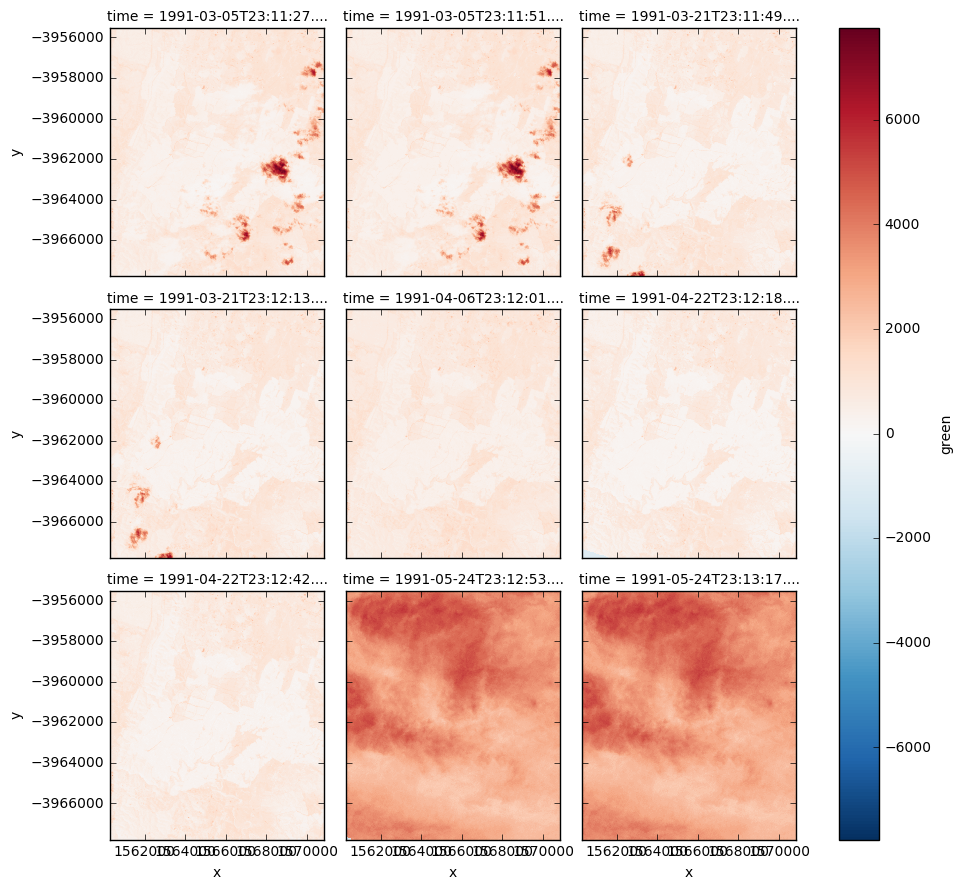

In [45]:
# Using autumn, plot for each time, col_wrap specifies number of columns in plot
autumn.plot(col='time', col_wrap=3)

## Masking out NO_DATA values
When there is no data availaible, such as on the boundaries of a scene, it is filled in with a special value.
We can use filter it out, although xarray will convert the data from `int` to `float` so that it can use `NaN` to indicate no data.

Now that bad values are no longer represented as `-9999`, the data fits on a much better colour ramp:

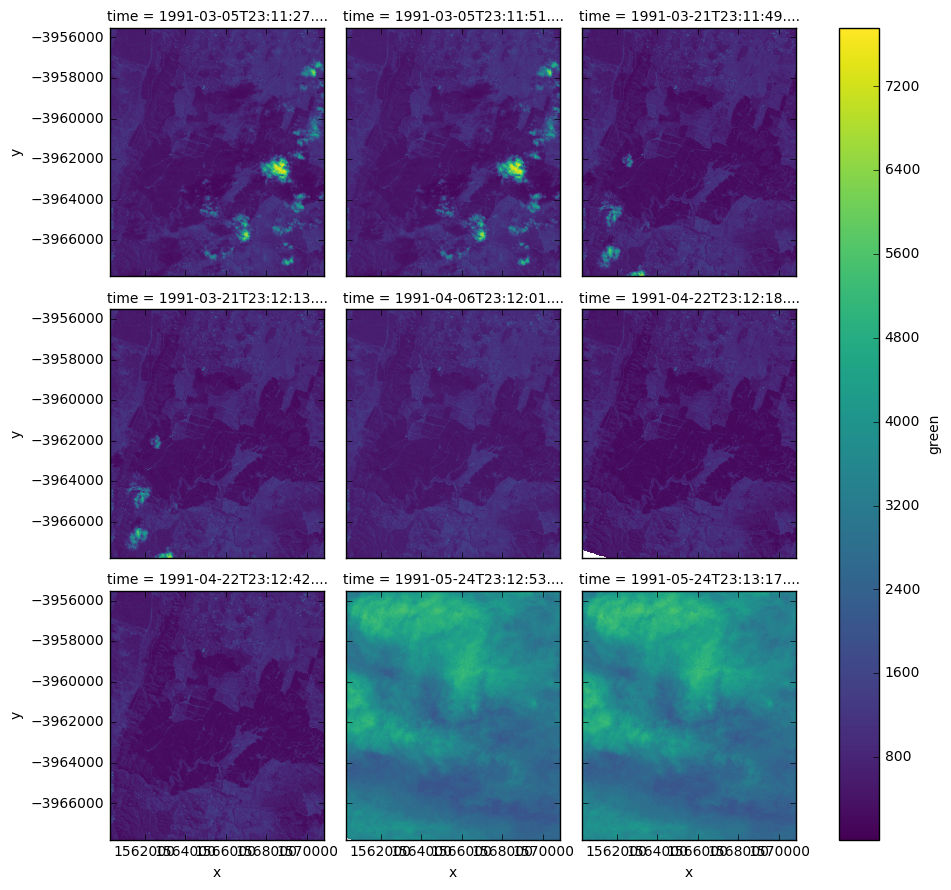

In [46]:
# new variable "autumn_valid", made up of locations in autumn where "nodata" is false
#i.e. ignore areas where there is missing data
autumn_valid = autumn.where(autumn != autumn.attrs['nodata'])
# and plot as before...
autumn_valid.plot(col='time', col_wrap=3)

## Masking out cloud
Some of the images are clearly clouds, we should remove them.  There is a product with detected clouds called **PQ** (for Pixel Quality) we can use to mask out the clouds.

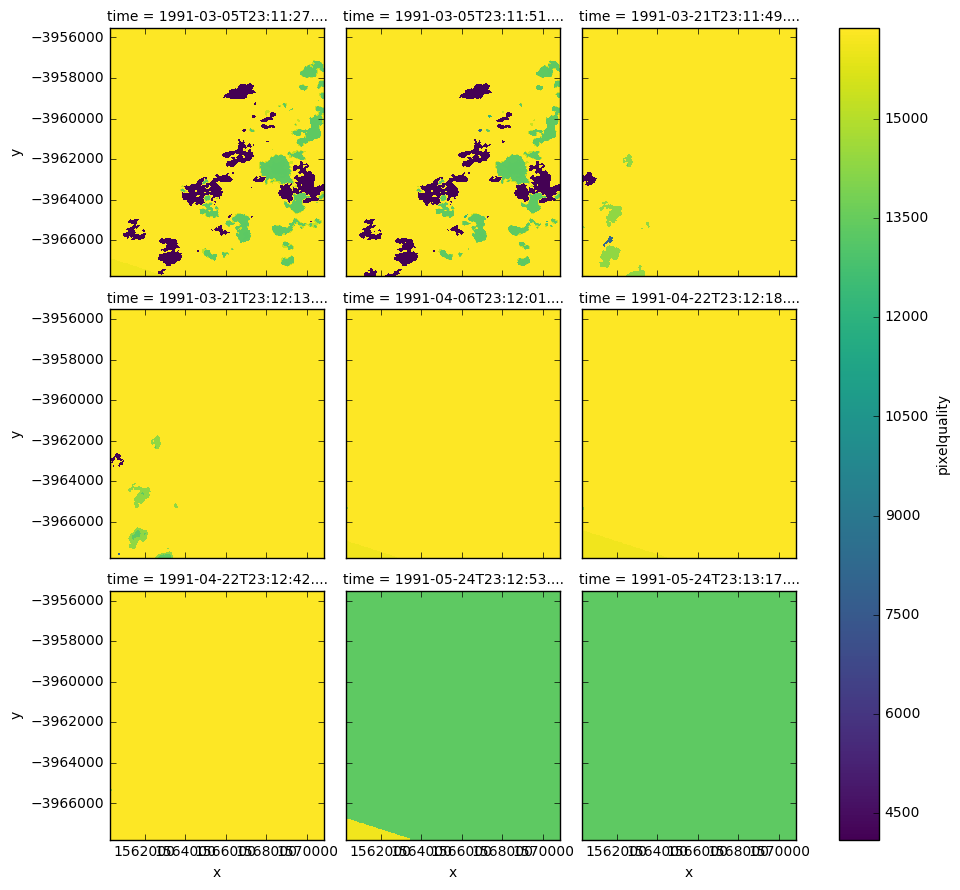

In [47]:
# Load some new data from the datacube
# Notice now we are loading ls5_pq... to give us info on pixel quality
pq = dc.load(product='ls5_pq_albers', x=(149.25, 149.35), y=(-35.25, -35.35))
# New var is in pq, in variable pixelquality, where time is...
pq_autumn = pq.pixelquality.loc['1991-3':'1991-5']
# Plot as before
pq_autumn.plot(col='time', col_wrap=3)

The PQ layer stores a bitmask of several values. We can list the information available:

In [48]:
# Import masking from new library datacube.storage
from datacube.storage import masking
# import pandas library
import pandas
# Use pandas to create a dataframe (table) using the masking function and pq dataset. Do this in 
# rows (index)
pandas.DataFrame.from_dict(masking.get_flags_def(pq), orient='index')

values  \
blue_saturated                              {u'1': False, u'0': True}   
cloud_acca                        {u'1': u'no_cloud', u'0': u'cloud'}   
cloud_fmask                       {u'1': u'no_cloud', u'0': u'cloud'}   
cloud_shadow_acca   {u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}   
cloud_shadow_fmask  {u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}   
contiguous                                  {u'1': True, u'0': False}   
ga_good_pixel                                        {u'16383': True}   
green_saturated                             {u'1': False, u'0': True}   
land_sea                                {u'1': u'land', u'0': u'sea'}   
nir_saturated                               {u'1': False, u'0': True}   
red_saturated                               {u'1': False, u'0': True}   
swir1_saturated                             {u'1': False, u'0': True}   
swir2_saturated                             {u'1': False, u'0': True}   
tir_saturated                               {u'1': False, u'0': True}   

                                                              bits  \
blue_saturated                                                   0   
cloud_acca                                                      10   
cloud_fmask                                                     11   
cloud_shadow_acca                                               12   
cloud_shadow_fmask                                              13   
contiguous                                                       8   
ga_good_pixel       [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
green_saturated                                                  1   
land_sea                                                         9   
nir_saturated                                                    3   
red_saturated                                                    2   
swir1_saturated                                                  4   
swir2_saturated                                                  7   
tir_saturated                                                    5   

                                                         description  
blue_saturated                                Blue band is saturated  
cloud_acca                                              Cloud (ACCA)  
cloud_fmask                                            Cloud (Fmask)  
cloud_shadow_acca                                Cloud Shadow (ACCA)  
cloud_shadow_fmask                              Cloud Shadow (Fmask)  
contiguous          All bands for this pixel contain non-null values  
ga_good_pixel                                     Best Quality Pixel  
green_saturated                              Green band is saturated  
land_sea                                                 Land or Sea  
nir_saturated                                  NIR band is saturated  
red_saturated                                  Red band is saturated  
swir1_saturated                              SWIR1 band is saturated  
swir2_saturated                              SWIR2 band is saturated  
tir_saturated                     Thermal Infrared band is saturated

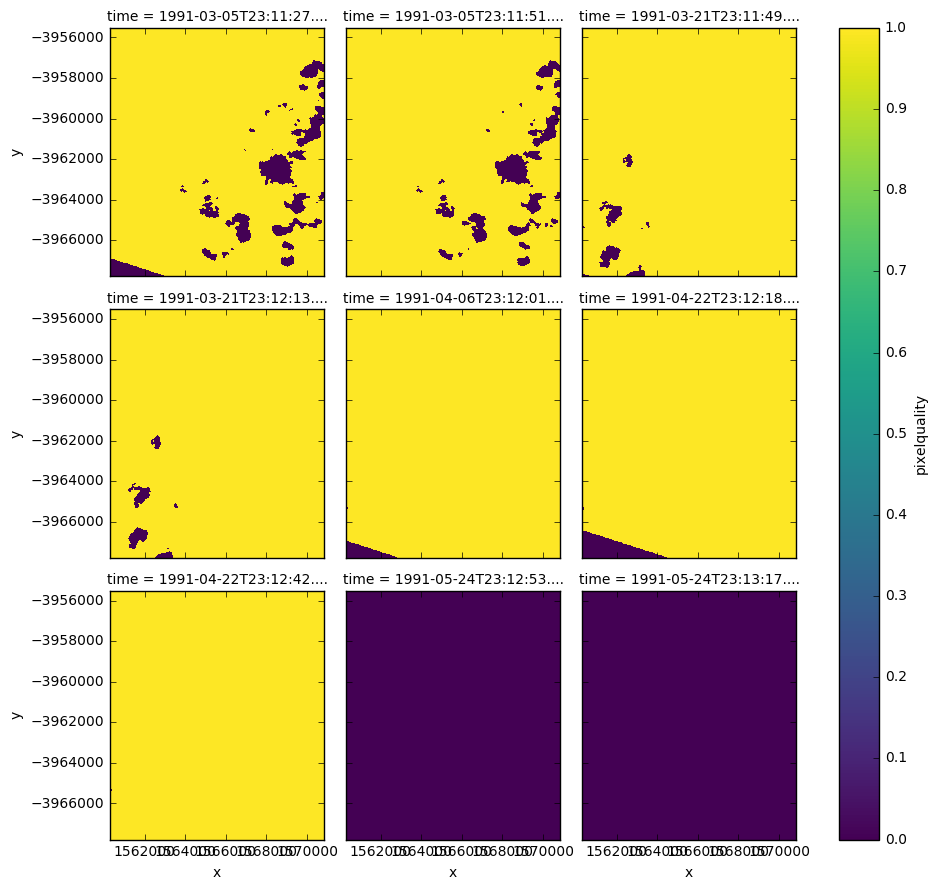

In [49]:
# Mask out bad data using make_mask function and the listed flags
good_data = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True)
# Pull out location in pixelquality variable in good_data
autumn_good_data = good_data.pixelquality.loc['1991-3':'1991-5']
# plot as above
autumn_good_data.plot(col='time', col_wrap=3)

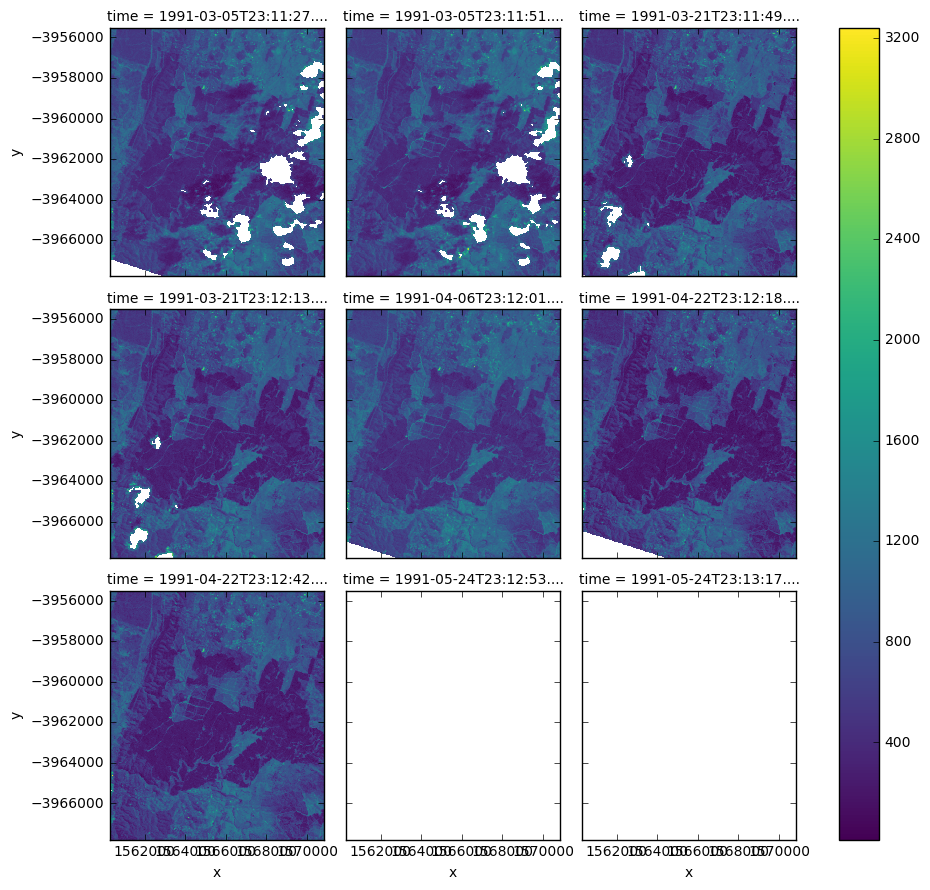

In [50]:
# Apply the mask to the data 
# autumn_clod_free is where autumn.valid and autumn_good_data both exist
autumn_cloud_free = autumn_valid.where(autumn_good_data)
# and plot
autumn_cloud_free.plot(col='time', col_wrap=3)

## Group by time
You may have noticed that some of the days above are repeated, with times less than a minute apart.  this is because of the overlap in LANDSAT scenes.  If we group by solar day (a rough local time based on longitude), we can combine these slices:

In [51]:
# load some data from the datacube, grouped by solar day
nbar_by_solar_day = dc.load(product='ls5_nbar_albers', x=(149.25, 149.35), y=(-35.25, -35.35), group_by='solar_day')
# How many times do we have now?
len(nbar_by_solar_day.time)

360

We have fewer times than we did previously.

In [52]:
# Subset this data by spectral band and time
autumn2 = nbar_by_solar_day.green.loc['1991-3':'1991-5']
# Check size of new variable
autumn2.shape

(5, 490, 421)

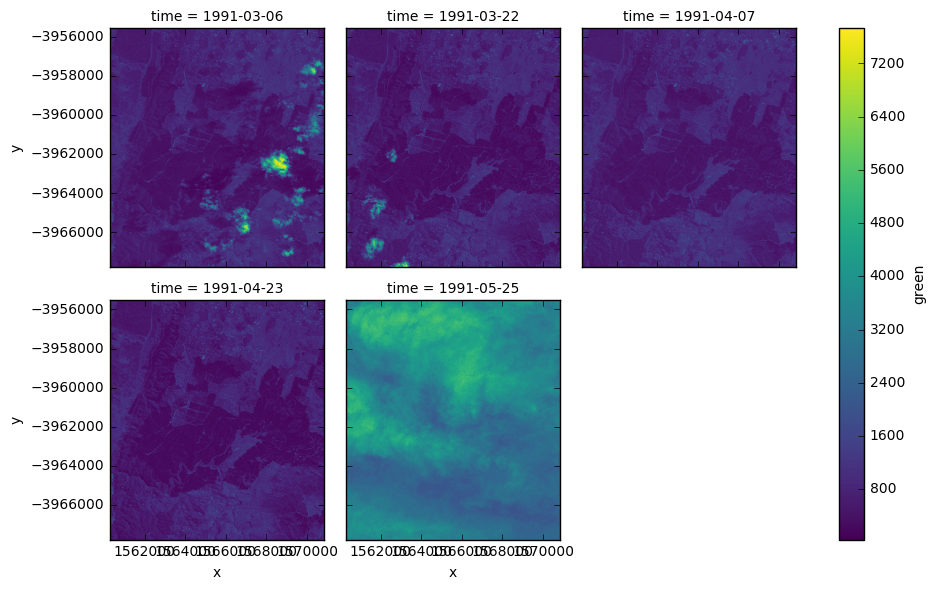

In [53]:
# and plot
autumn2.plot(col='time', col_wrap=3)

## Some basic band maths
We can combine the `red` and `nir` (_near-infrared_) bands to calculate NDVI (_normalised difference vegetation index_).

In [54]:
# Load in two bands at once from the datacube using "measurements"
two_bands = dc.load(product='ls5_nbar_albers', x=(149.07, 149.17), y=(-35.25, -35.35), 
                    time=('1991', '1992'), measurements=['red', 'nir'], group_by='solar_day')
# Find just the red band i.e. where data exists in red
red = two_bands.red.where(two_bands.red != two_bands.red.attrs['nodata'])
# Find just the nir band i.e. where data exists in nir
nir = two_bands.nir.where(two_bands.nir != two_bands.nir.attrs['nodata'])
# Load in pixel quality data
pq = dc.load(product='ls5_pq_albers', x=(149.07, 149.17), y=(-35.25, -35.35), 
             time=('1991', '1992'), group_by='solar_day')
# Make a mask for clouds
cloud_free = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True).pixelquality

# Calculate ndvi using the given equation, but only where it's cloud free
ndvi = ((nir - red) / (nir + red)).where(cloud_free)

In [55]:
# Check the size of the new variable
ndvi.shape

(35, 490, 420)

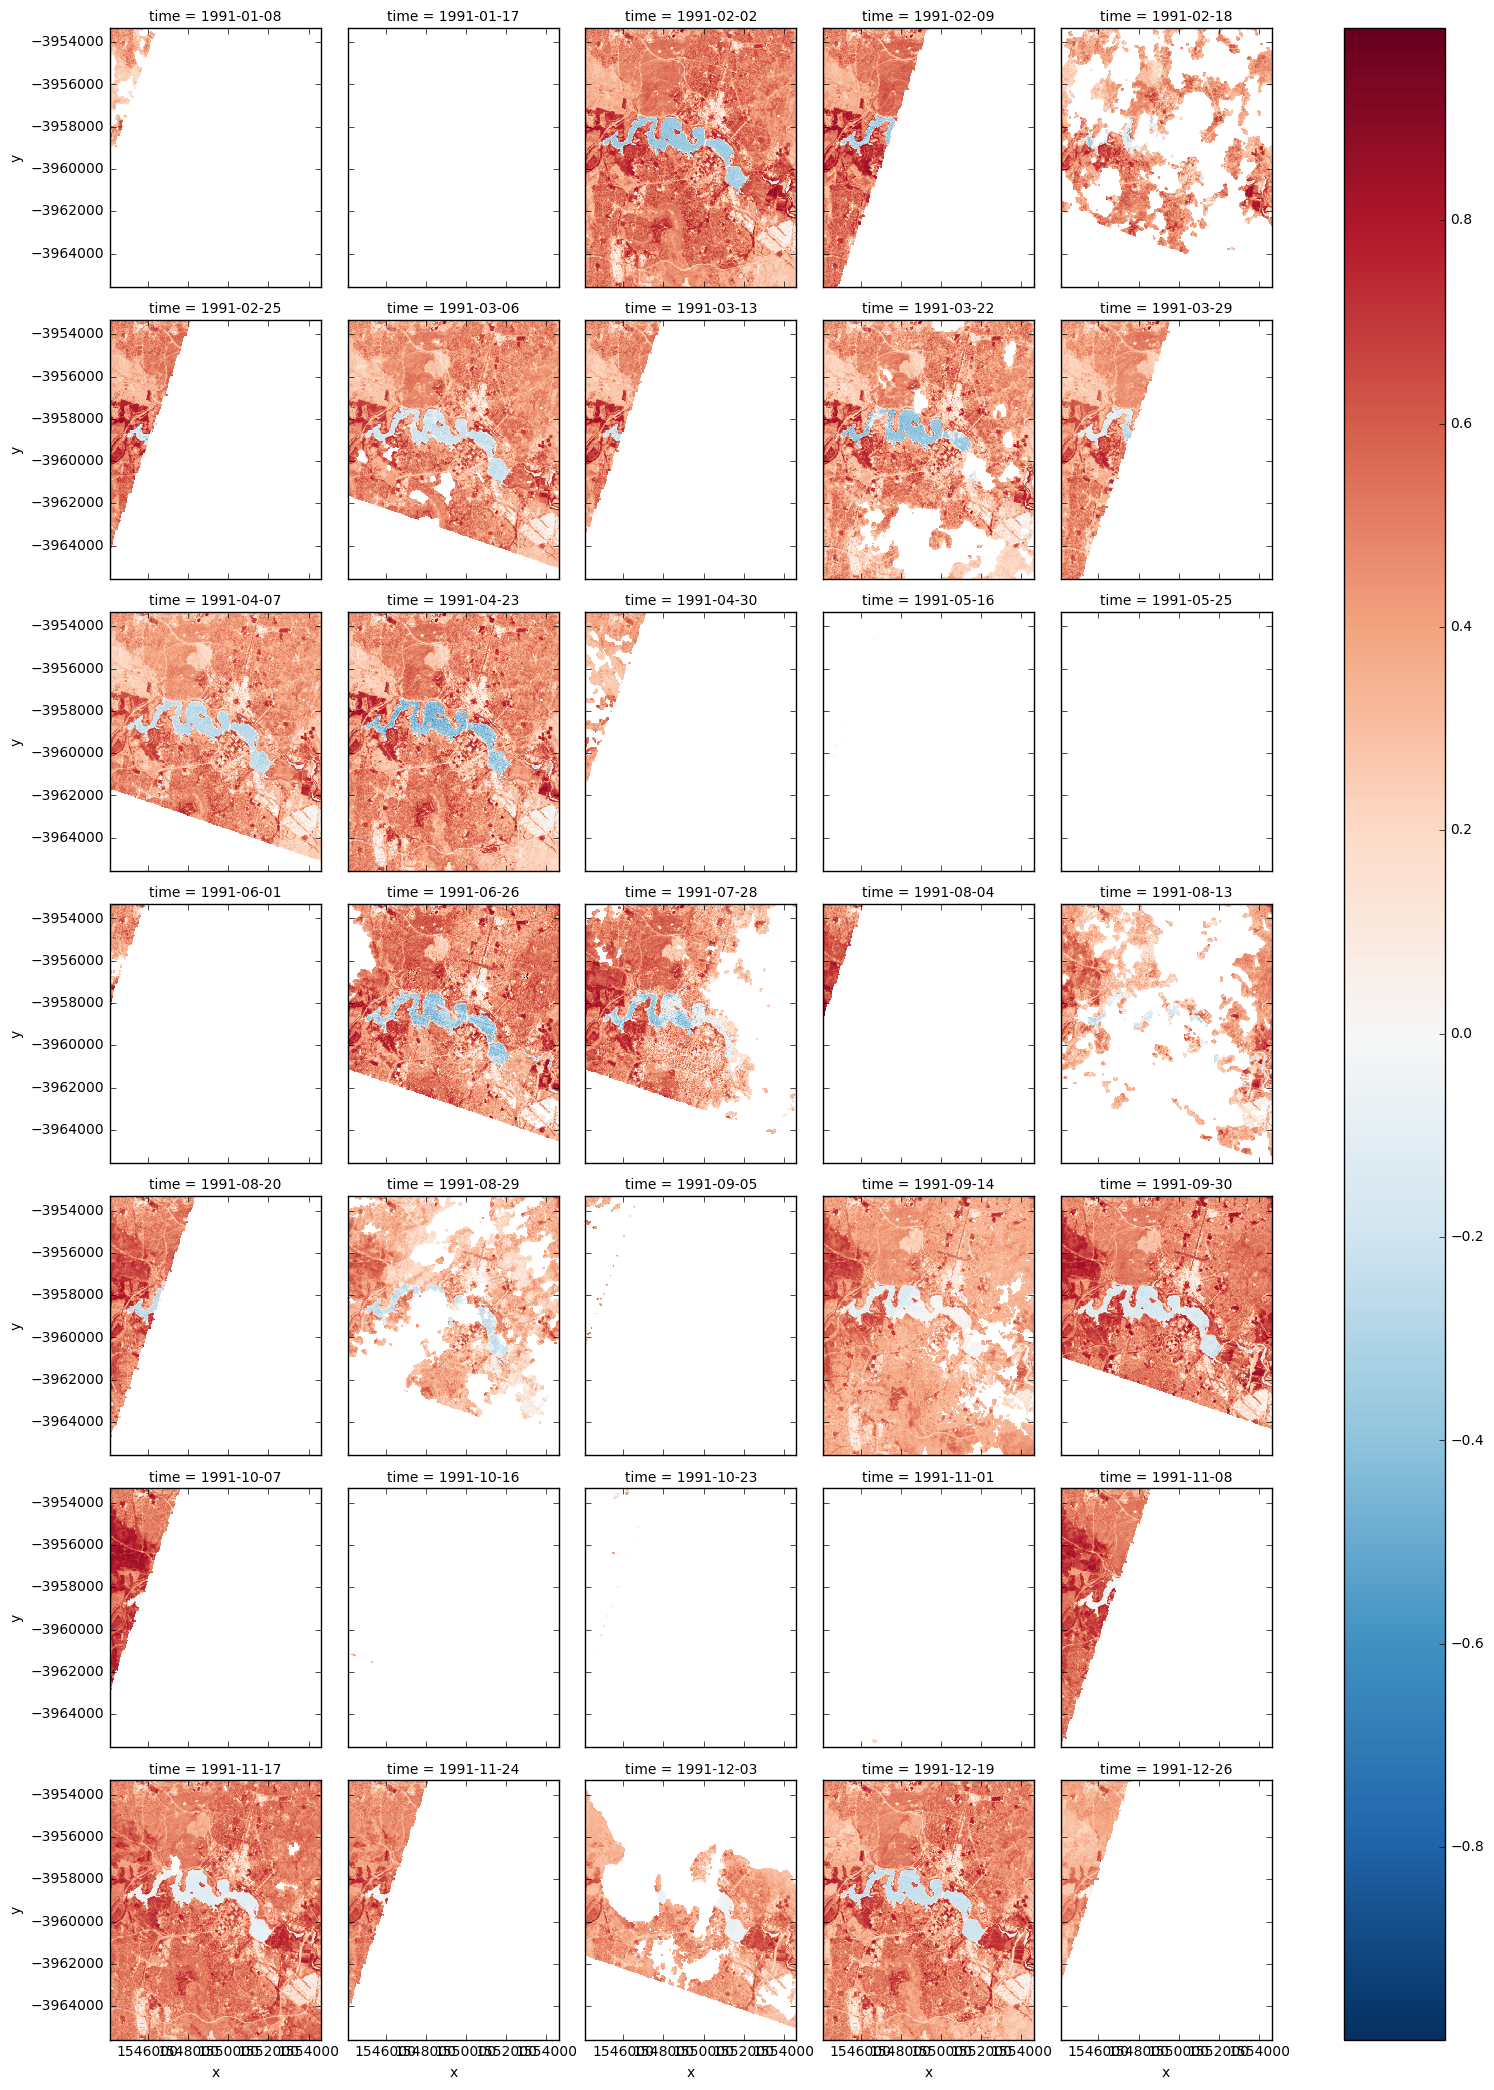

In [56]:
# and plot
ndvi.plot(col='time', col_wrap=5)

In [57]:
# Show me what's in "cloud_free"
cloud_free

<xarray.DataArray 'pixelquality' (time: 35, y: 490, x: 420)>
array([[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  Tr

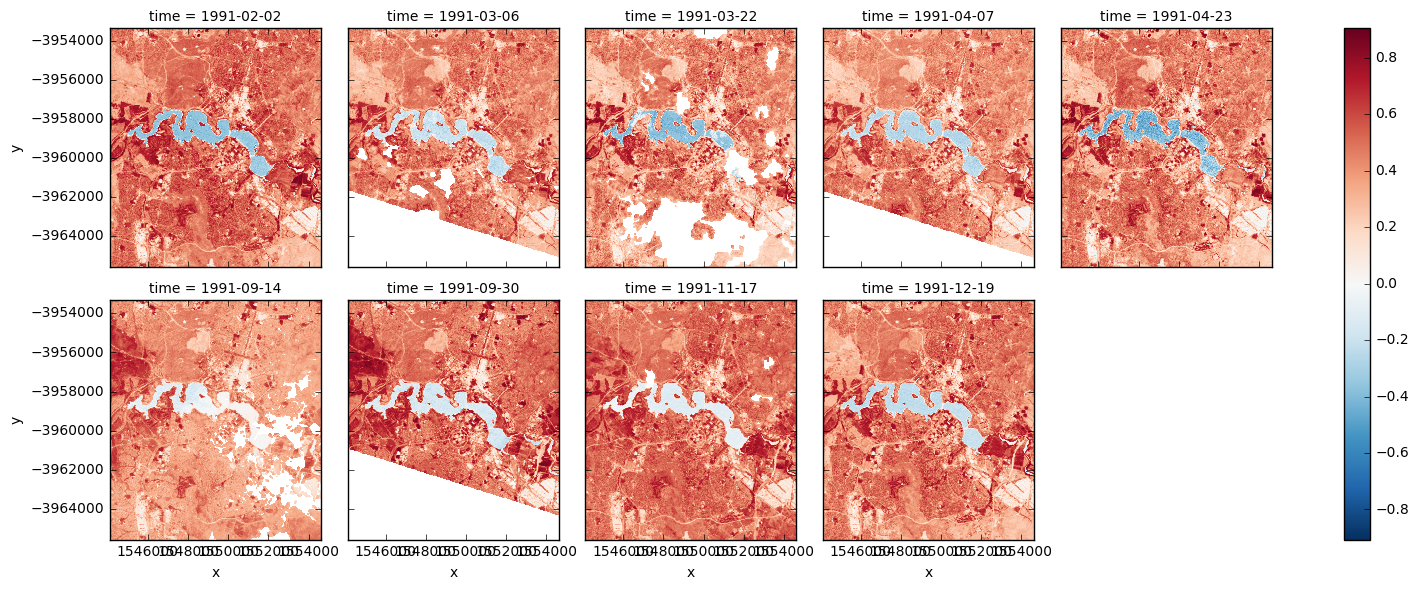

In [58]:
# Find where at least 75% of the image is cloud free
mostly_cloud_free = cloud_free.mean(dim=('x','y')) > 0.75
# return only the NDVI times where there are no clouds
# dropna - return object with labels on given axis omitted where any/all the data are missing
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
# and plot...
mostly_good_ndvi.plot(col='time', col_wrap=5)

## Some stats

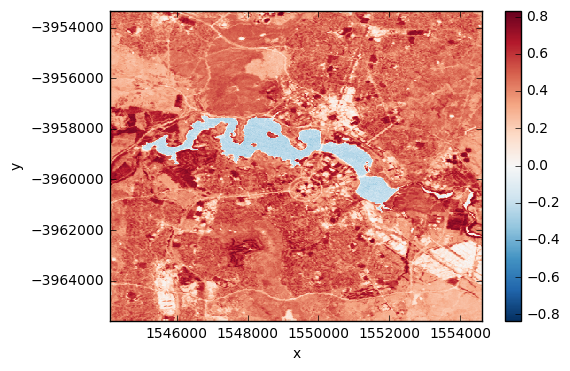

In [59]:
# plot the median of all times
mostly_good_ndvi.median(dim='time').plot()

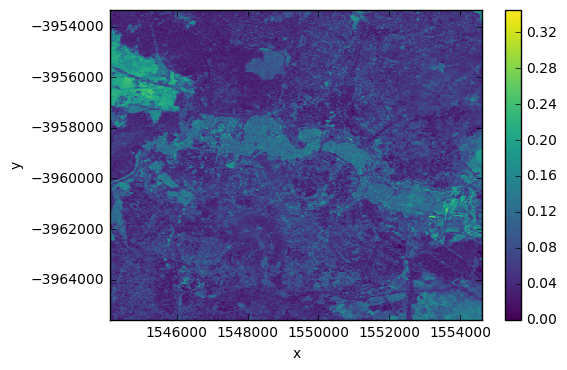

In [60]:
# plot the standard deviation of all times
mostly_good_ndvi.std(dim='time').plot()

## Pixel drill

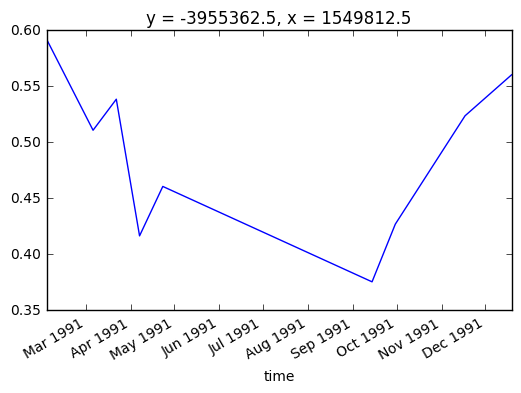

In [61]:
# Get only the data where x=... and y=.... 'nearest' finds the nearest point.
mostly_good_ndvi.sel(y=-3955361, x=1549813, method='nearest').plot()

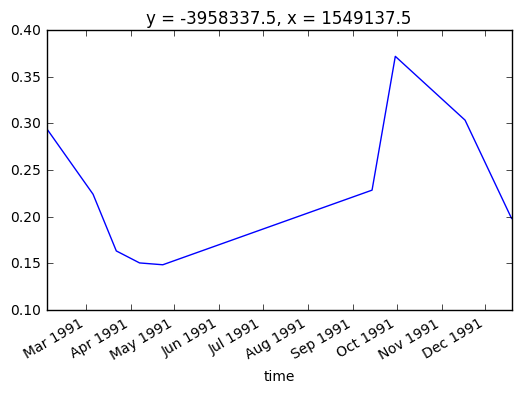

In [62]:
# isel = intiger indexing. Same as above but uses the index value, not the lat/lon
mostly_good_ndvi.isel(x=[200], y=[200]).plot()

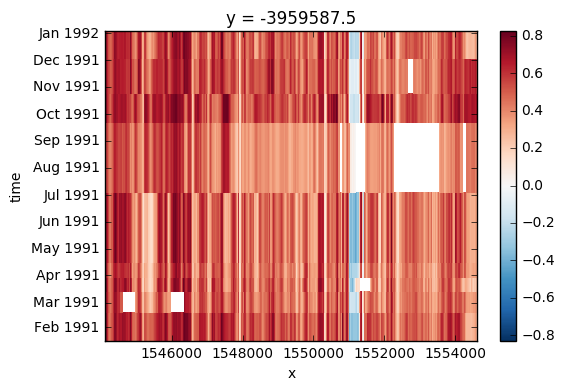

In [63]:
# specify just y to get all x
mostly_good_ndvi.isel(y=250).plot()

A line shapefile with pairs of coordinates (using `sel_points` instead of `isel_points`) would be able to be interpolated into something less blocky for the next plot.

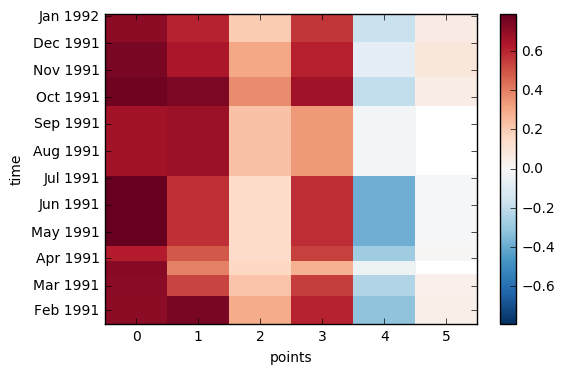

In [64]:
# select just a series of indexed locations. Plot as points vs time
mostly_good_ndvi.isel_points(x=[0, 100, 200, 300, 300, 400], 
                             y=[200, 200, 200, 250, 300, 400]).plot(x='points', y='time')

## Plotting a multi-band image

In [4]:
# Load data from the datacube using the specified attributes. 
# Set the column headings to time, y, x, color
rgb = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('1991-3-1', '1991-6-30'), 
              measurements=['red', 'green', 'blue'], 
              group_by='solar_day', stack='color').transpose('time', 'y', 'x', 'color')
# Zip = join two lists together. Show both dims and shape of rgb
zip(rgb.dims, rgb.shape)

[('time', 11), ('y', 490), ('x', 420), ('color', 3)]

In [5]:
# set a threshold value to cut data at
fake_saturation = 3000
# Only give me data where rgb < the threshold, where it's more, make it = the threshold
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
# Scale the image according to the maximum values
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)
scaled.shape

(11, 490, 420, 3)

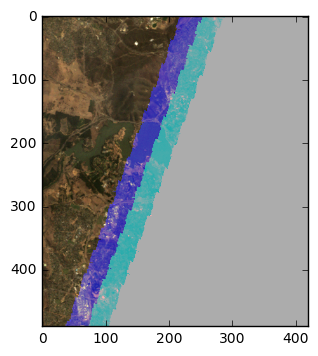

In [67]:
# Import a new library for plotting, and plot the image
from matplotlib import pyplot as plt
# Plot the third time step
plt.imshow(scaled.isel(time=3))

## Elevation

In [69]:
# Load some elevation data from the datacube
grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35))
# Show me the size of the elevation data
grid.elevation.shape

RasterioIOError: Permission denied

In [ ]:
grid.elevation[0].plot()

## Reprojection

In [ ]:
albers_grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35), 
                      output_crs='EPSG:3577', resolution=(-25,25))
albers_grid.elevation.shape

In [ ]:
albers_grid.elevation[0].plot()